Loading dataset from keggle for house price prediction

In [1]:
import pandas as pd
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df1['area_type'].value_counts() # inorder to count and the the options for area type

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [3]:
df1.isnull().sum() # to check that if there is any null value in attributes

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df1.columns 

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df2 = df1.drop(['area_type', 'availability','society','balcony'],axis=1) # to remove the columns

In [6]:
df2.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [7]:
  df2.shape

(13320, 5)

In [8]:
df2 = df2.dropna().reset_index()

In [9]:
df2.head()

,index,location,size,total_sqft,bath,price
0,0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,2,Uttarahalli,3 BHK,1440,2.0,62.00
3,3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.drop(['index'],axis=1,inplace=True)

In [11]:
df2.dtypes #to check datatypes of all the columns

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [12]:
df2['location'].value_counts()

Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Anekal                  1
Chikkabidarakallu        1
Havanur extension        1
Chowdeshwari Layout      1
Prakruthi Township       1
Name: location, Length: 1304, dtype: int64

In [13]:
from tqdm import tqdm
Bed_room = []
for i in tqdm(range(len(df2))):
  Bed_room.append(int(df2['size'].str.split(' ')[i][0]))

100%|██████████| 13246/13246 [03:12<00:00, 68.96it/s]


In [14]:
df2['size'] = Bed_room

In [15]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [16]:
df2['total_sqft'].astype(float)

ValueError: ignored

In [17]:
def is_num(x):
  try:
    float(x)
  except:
    return False
  return True

In [18]:
is_num('3456.66 - 6787.99')

False

In [19]:
df2[df2['total_sqft'].apply(is_num)]

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13241,Whitefield,5,3453,4.0,231.00
13242,Richards Town,4,3600,5.0,400.00
13243,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13244,Padmanabhanagar,4,4689,4.0,488.00


In [20]:
df2[~df2['total_sqft'].apply(is_num)]

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
120,Hebbal,4,3067 - 8156,4.0,477.000
135,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
163,Sarjapur,2,1145 - 1340,2.0,43.490
186,KR Puram,2,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12902,Whitefield,2,850 - 1060,2.0,38.190
12917,Talaghattapura,3,1804 - 2273,3.0,122.000
12986,Harlur,2,1200 - 1470,2.0,72.760
13191,Hoodi,2,1133 - 1384,2.0,59.135


In [21]:
v = '2830 - 2882'
(float(v.split('-')[0]) + float(v.split('-')[1]))/2

2856.0

In [22]:
def convert_to_num(v):
  val = v.split('-')
  if len(val) == 2:
    return((float(val[0]) + float(val[1]))/2)
  try:
    return float(v)
  except:
    return None

In [23]:
df3 = df2.copy()

In [24]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_to_num)

In [25]:
df2.dtypes

location       object
size            int64
total_sqft    float64
bath          float64
price         float64
dtype: object

In [27]:
df2.isnull().sum() #checking for null

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [28]:
df2.dropna(inplace=True)

In [29]:
df2[df2['total_sqft'].isnull()]

,location,size,total_sqft,bath,price


In [30]:
df2.isnull().sum() # now there is no null

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [31]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [33]:
s = ' Bipul ' 
s.strip()   #white space removal

'Bipul'

In [34]:
df2['location'].apply(lambda x:x.strip())
loc_count = df2['location'].value_counts()

In [35]:
len(loc_count)

1298

In [36]:
(loc_count > 10).sum()

240

In [37]:
(loc_count <= 10).sum()

1058

In [38]:
loc_count_less_10 = loc_count[loc_count<=10]

In [39]:
df2['location'] = df2['location'].apply(lambda x: 'Other' if x in loc_count_less_10 else x)

In [40]:
len(df2['location'].unique())

241

In [41]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


**Outliers**
an outlier is a data point that differs significantly from other observations.

In [42]:
df2['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [43]:
df2 = df2[~(df2['total_sqft']/df2['size'] < 300)]

In [44]:
3df2.head()

SyntaxError: ignored

In [45]:
df2['PPS'] = df2['price'] * 100000 / df2['total_sqft']

In [46]:
df2.head()

,location,size,total_sqft,bath,price,PPS
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [47]:
df2['PPS'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: PPS, dtype: float64

In [48]:
df2.head()

,location,size,total_sqft,bath,price,PPS
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [49]:
print(df2.groupby('location')['PPS'].mean().sort_values())

location
Chandapura                      3041.346150
Bommasandra Industrial Area     3117.507926
Kereguddadahalli                3259.150303
Ananth Nagar                    3320.335293
Kammasandra                     3489.050503
                                   ...     
2nd Stage Nagarbhavi           14381.275720
Giri Nagar                     14587.820513
Bommenahalli                   15361.577714
HAL 2nd Stage                  19134.461565
Cunningham Road                20632.478844
Name: PPS, Length: 241, dtype: float64


In [50]:
print(df2.groupby('location')['PPS'].max().sort_values())

location
Bommasandra Industrial Area      4000.000000
Kereguddadahalli                 4125.000000
Vasanthapura                     4476.190476
Doddakallasandra                 4612.916165
NGR Layout                       4750.000000
                                   ...      
Whitefield                      47994.652406
Indira Nagar                    52083.333333
Bannerghatta Road               56000.000000
Bommenahalli                    76530.612245
Other                          176470.588235
Name: PPS, Length: 241, dtype: float64


In [51]:
print(df2.groupby('location')['PPS'].min().sort_values())

location
Other                    267.829813
Yelahanka                371.428571
Begur                    500.000000
JP Nagar                 875.000000
Kengeri                 1166.666667
                           ...     
Sarakki Nagar           7083.333333
Bommenahalli            7487.271638
Sector 7 HSR Layout     7692.307692
HAL 2nd Stage           7812.500000
Cunningham Road        12527.472527
Name: PPS, Length: 241, dtype: float64


In [52]:
df2.shape

(12456, 6)

In [53]:
for key,dfloc in df2.groupby('location'):
  print(key,dfloc)

Streaming output truncated to the last 5000 lines.
1006   Attibele     1       400.0   1.0   12.00   3000.000000
1498   Attibele     1       400.0   1.0   14.00   3500.000000
1632   Attibele     1       500.0   1.0   17.00   3400.000000
2144   Attibele     4      2168.0   4.0   95.00   4381.918819
2419   Attibele     1       395.0   1.0   10.25   2594.936709
3217   Attibele     4      3640.0   4.0  275.00   7554.945055
3551   Attibele     1       420.0   1.0   17.00   4047.619048
4483   Attibele     3      1639.0   2.0   40.98   2500.305064
4911   Attibele     1       418.0   1.0   12.00   2870.813397
4924   Attibele     3      1350.0   3.0   85.00   6296.296296
5227   Attibele     2      1200.0   2.0   42.00   3500.000000
5376   Attibele     1       400.0   1.0   10.00   2500.000000
5662   Attibele     2       695.0   1.0   25.00   3597.122302
5668   Attibele     2       850.0   1.0   25.00   2941.176471
6614   Attibele     3      2400.0   3.0  120.00   5000.000000
7001   Attibele    

In [54]:
df4 = pd.DataFrame()
import numpy as np
for key,dfloc in df2.groupby('location'):
  #print(key,dfloc)
  m = np.mean(dfloc['PPS'])
  st = np.std(dfloc['PPS'])
  #print(key,m,st)

  extracted_df = dfloc[(dfloc['PPS'] > (m-st)) & (dfloc['PPS'] < (m+st))]
  df4 = pd.concat([df4,extracted_df],ignore_index=True)

In [55]:
df4

,location,size,total_sqft,bath,price,PPS
0,Devarachikkanahalli,3,1250.0,2.0,44.00,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.00,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.00,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.00,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.00,4561.403509
...,...,...,...,...,...,...
10240,Yeshwanthpur,3,1676.0,3.0,92.13,5497.016706
10241,Yeshwanthpur,3,2503.0,3.0,138.00,5513.383939
10242,Yeshwanthpur,3,1855.0,3.0,135.00,7277.628032
10243,Yeshwanthpur,3,1876.0,3.0,160.00,8528.784648


In [56]:
df4.head()

,location,size,total_sqft,bath,price,PPS
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


In [57]:
df4['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


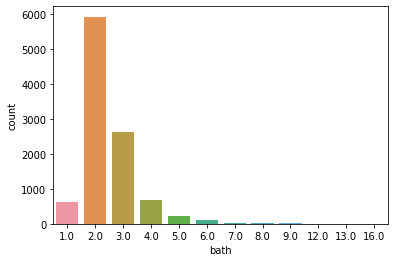

In [58]:
import seaborn as sns
sns.countplot(df4['bath'])

In [59]:
df4[df4['bath'] > 10]

,location,size,total_sqft,bath,price,PPS
5271,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
5925,Other,10,12000.0,12.0,525.0,4375.000000
6014,Other,16,10000.0,16.0,550.0,5500.000000
6754,Other,11,6000.0,12.0,150.0,2500.000000
7086,Other,13,5425.0,13.0,275.0,5069.124424


In [60]:
df4[df4['bath'] > df4['size']+2]

,location,size,total_sqft,bath,price,PPS
1637,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
5232,Nagasandra,4,7000.0,8.0,450.0,6428.571429
5849,Other,6,11338.0,9.0,1000.0,8819.897689
9021,Thanisandra,3,1806.0,6.0,116.0,6423.034330


In [61]:
df4 = df4[df4['bath'] < df4['size']+2]
df4.shape

(10151, 6)

In [62]:
df4[df4['bath'] < df4['size']+2]

,location,size,total_sqft,bath,price,PPS
0,Devarachikkanahalli,3,1250.0,2.0,44.00,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.00,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.00,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.00,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.00,4561.403509
...,...,...,...,...,...,...
10240,Yeshwanthpur,3,1676.0,3.0,92.13,5497.016706
10241,Yeshwanthpur,3,2503.0,3.0,138.00,5513.383939
10242,Yeshwanthpur,3,1855.0,3.0,135.00,7277.628032
10243,Yeshwanthpur,3,1876.0,3.0,160.00,8528.784648


In [63]:
df4.head()

,location,size,total_sqft,bath,price,PPS
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


In [64]:
df5 = df4[['location','size', 'total_sqft' ,'bath', 	'price']]
df5.head()

,location,size,total_sqft,bath,price
0,Devarachikkanahalli,3,1250.0,2.0,44.0
1,Devarachikkanahalli,2,1250.0,2.0,40.0
2,Devarachikkanahalli,2,1200.0,2.0,83.0
3,Devarachikkanahalli,2,1170.0,2.0,40.0
4,Devarachikkanahalli,3,1425.0,2.0,65.0


In [65]:
df_encoded = pd.get_dummies(df5['location'])

In [66]:
df6 = pd.concat([df5,df_encoded],axis='columns')
df6.head()

,location,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,3,1250.0,2.0,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,2,1250.0,2.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200.0,2.0,83.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2,1170.0,2.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3,1425.0,2.0,65.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df6.drop('location',axis=1,inplace=True)

In [68]:
df6.head()

,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,1250.0,2.0,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1250.0,2.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,83.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,65.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
X = df6.drop('price',axis=1)
Y = df6[['price']]

In [70]:
X

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,1250.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1250.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10240,3,1676.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10241,3,2503.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10242,3,1855.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10243,3,1876.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
Y

,price
0,44.00
1,40.00
2,83.00
3,40.00
4,65.00
...,...
10240,92.13
10241,138.00
10242,135.00
10243,160.00


In [72]:
df6.to_csv('banglore_final.csv')

In [73]:
import pandas as pd
bdf = pd.read_csv('banglore_final.csv',index_col=0)

In [74]:
bdf.head()

,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,1250.0,2.0,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1250.0,2.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,83.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,65.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
X = bdf.drop('price',axis=1)
Y = bdf[['price']]

In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [77]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
lmodel.score(xtrain,ytrain)

0.8121850444331071

In [79]:
lmodel.score(xtest,ytest)

0.8158098157178675

In [80]:
#Error values
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Training Mean Absolute Error',mean_absolute_error(ytrain,lmodel.predict(xtrain)))
print('Training Mean Absolute Error',mean_absolute_error(ytest,lmodel.predict(xtest)))

Training Mean Absolute Error 18.822795801993173
Training Mean Absolute Error 18.7865739472586


In [81]:
#K-fold Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross = ShuffleSplit(n_splits = 7, test_size=0.2, random_state=0)

cross_val_score(LinearRegression() , X, Y, cv = cross)

array([0.73319931, 0.77324344, 0.80063024, 0.78269723, 0.80264728,
       0.83989167, 0.84093772])

In [82]:
len(X.columns)

244

In [83]:
import numpy as np
np.where(X.columns == 'Vijayanagar')[0][0]

234

In [84]:
np.where(X.columns == '2nd Stage Nagarbhavi')[0][0]

7

In [85]:
#size 	total_sqft 	bath
#3,2000,3,0,0,0,0,1,000000000000000

loc = np.where(X.columns == '2nd Stage Nagarbhavi')[0][0]
loc

7

In [86]:
x = np.zeros(len(X))
x

array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
X.shape[1]

244

In [88]:
def predict_my_price(location,sqft,beds,baths):
  loc = np.where(X.columns == location)[0][0]

  x = np.zeros(X.shape[1])
  x[0] = beds
  x[1] = sqft
  x[2] = baths

  x[loc] = 1 

  return(lmodel.predict([x]))

In [89]:
X.columns

Index(['size', 'total_sqft', 'bath', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [90]:
k = predict_my_price('1st Phase JP Nagar',1000,3,2)
print(k)

[[72.33735695]]


In [91]:
xtrain.shape

(7613, 244)